In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
PdM_telemetry = pd.read_csv('/content/PdM_telemetry.csv')

In [98]:
PdM_telemetry.head()

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511


In [48]:
PdM_telemetry.corr()

<ipython-input-48-191783ee110a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  PdM_telemetry.corr()


,machineID,volt,rotate,pressure,vibration
machineID,1.000000,-0.001037,0.000171,0.005192,-0.000922
volt,-0.001037,1.000000,-0.001511,0.001652,0.002390
rotate,0.000171,-0.001511,1.000000,-0.000688,-0.003056
pressure,0.005192,0.001652,-0.000688,1.000000,0.001395
vibration,-0.000922,0.002390,-0.003056,0.001395,1.000000


<ipython-input-49-28d4c3ea3f6c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(PdM_telemetry.corr(), cmap="crest", annot=True)


<Axes: >

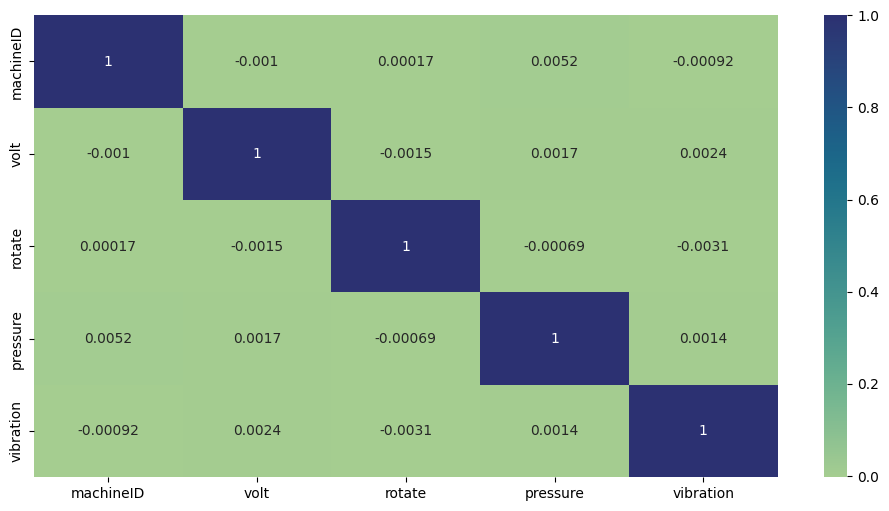

In [49]:
plt.figure(figsize=(12, 6))
sns.heatmap(PdM_telemetry.corr(), cmap="crest", annot=True)

In [5]:
PdM_telemetry['datetime'] = pd.to_datetime(PdM_telemetry['datetime'])

In [6]:
PdM_telemetry['year'] =  PdM_telemetry['datetime'].dt.year
PdM_telemetry['month'] = PdM_telemetry['datetime'].dt.month
PdM_telemetry['day'] =   PdM_telemetry['datetime'].dt.day
PdM_telemetry['hour'] =  PdM_telemetry['datetime'].dt.hour


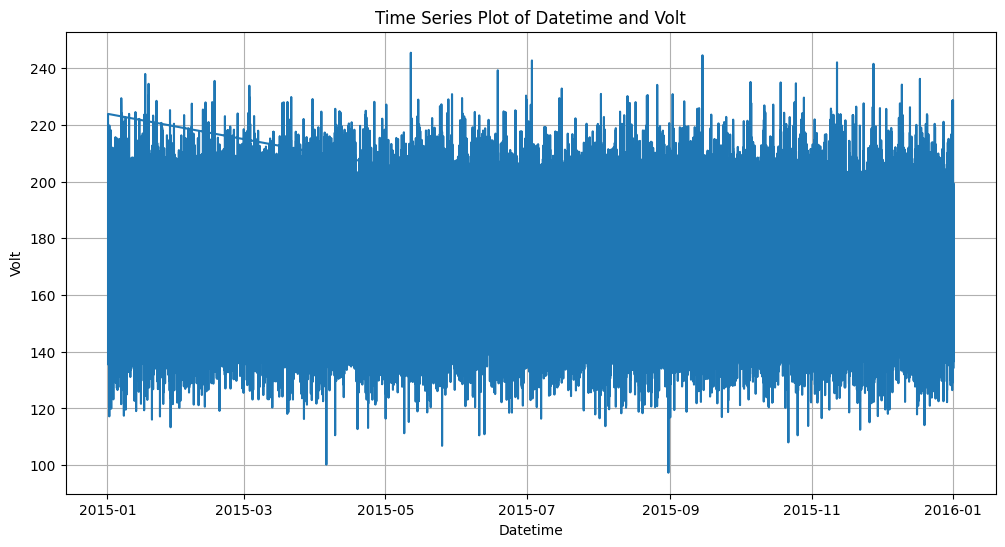

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(PdM_telemetry['datetime'], PdM_telemetry['volt'])
plt.xlabel('Datetime')
plt.ylabel('Volt')
plt.title('Time Series Plot of Datetime and Volt')
plt.grid(True)
plt.show()

In [19]:
PdM_telemetry.groupby('month')['volt'].mean()

month
1     170.749572
2     171.090045
3     170.938549
4     170.623793
5     170.921591
6     170.955028
7     170.512967
8     170.840856
9     170.628898
10    171.064948
11    170.459027
12    170.550283
Name: volt, dtype: float64

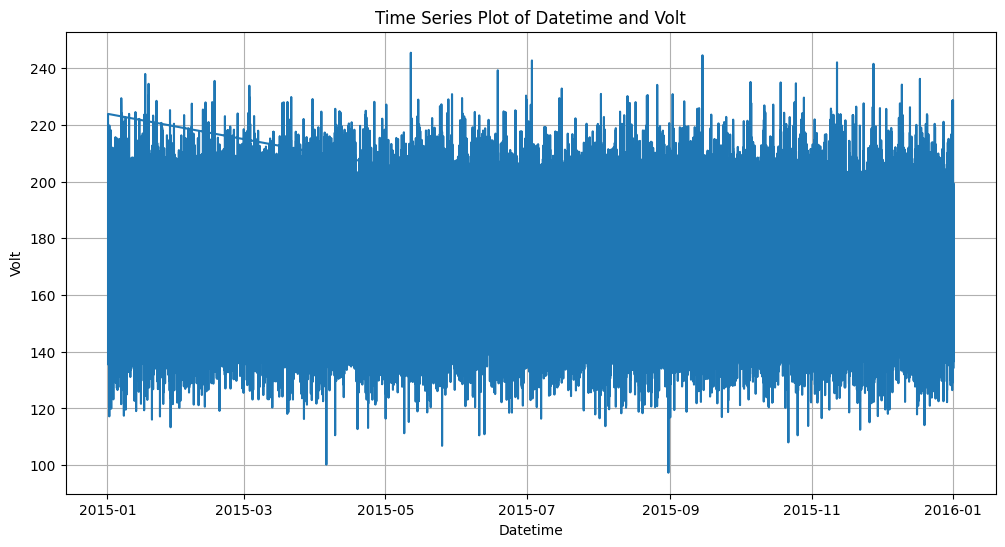

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(PdM_telemetry['datetime'], PdM_telemetry['volt'])
plt.xlabel('Datetime')
plt.ylabel('Volt')
plt.title('Time Series Plot of Datetime and Volt')
plt.grid(True)
plt.show()

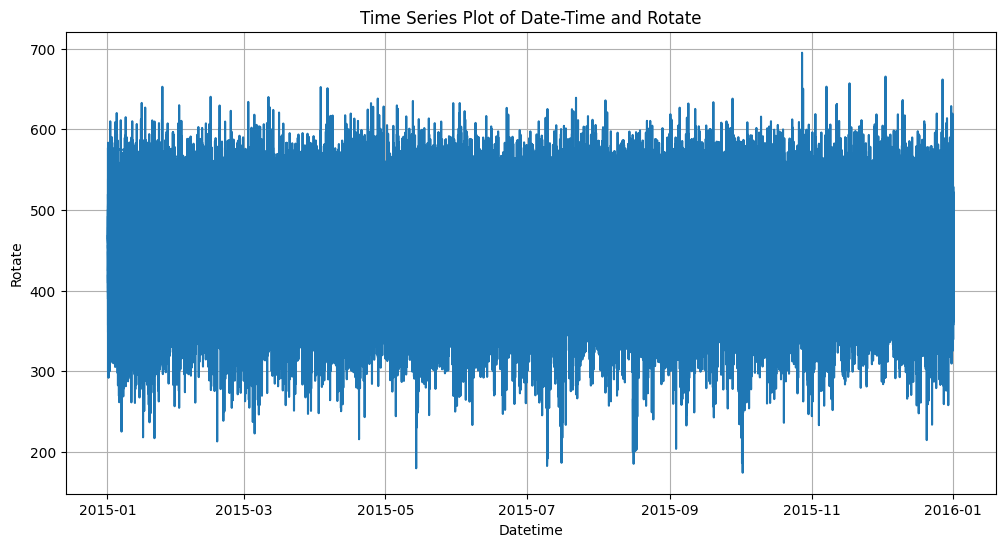

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(PdM_telemetry['datetime'], PdM_telemetry['rotate'])
plt.xlabel('Datetime')
plt.ylabel('Rotate')
plt.title('Time Series Plot of Date-Time and Rotate')
plt.grid(True)
plt.show()

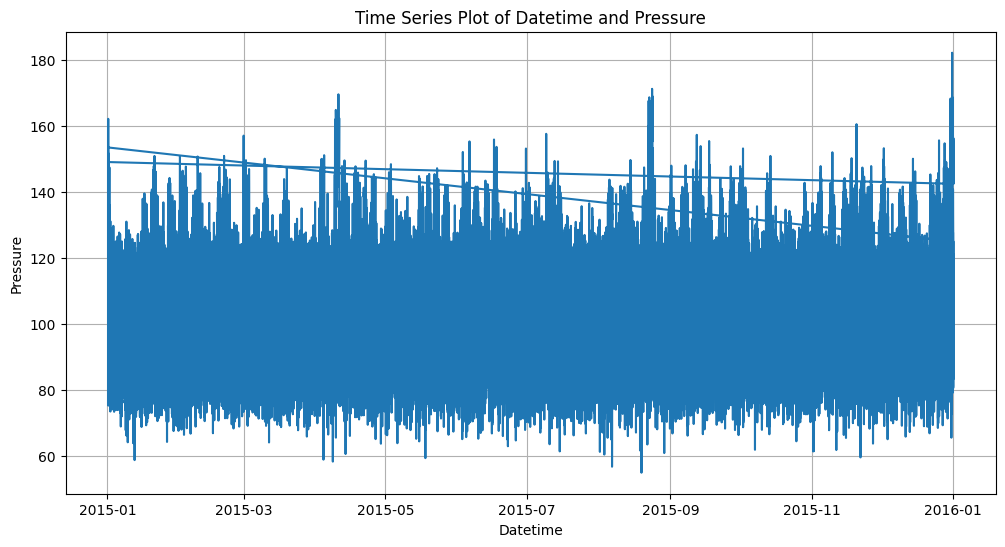

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(PdM_telemetry['datetime'], PdM_telemetry['pressure'])
plt.xlabel('Datetime')
plt.ylabel('Pressure')
plt.title('Time Series Plot of Datetime and Pressure')
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

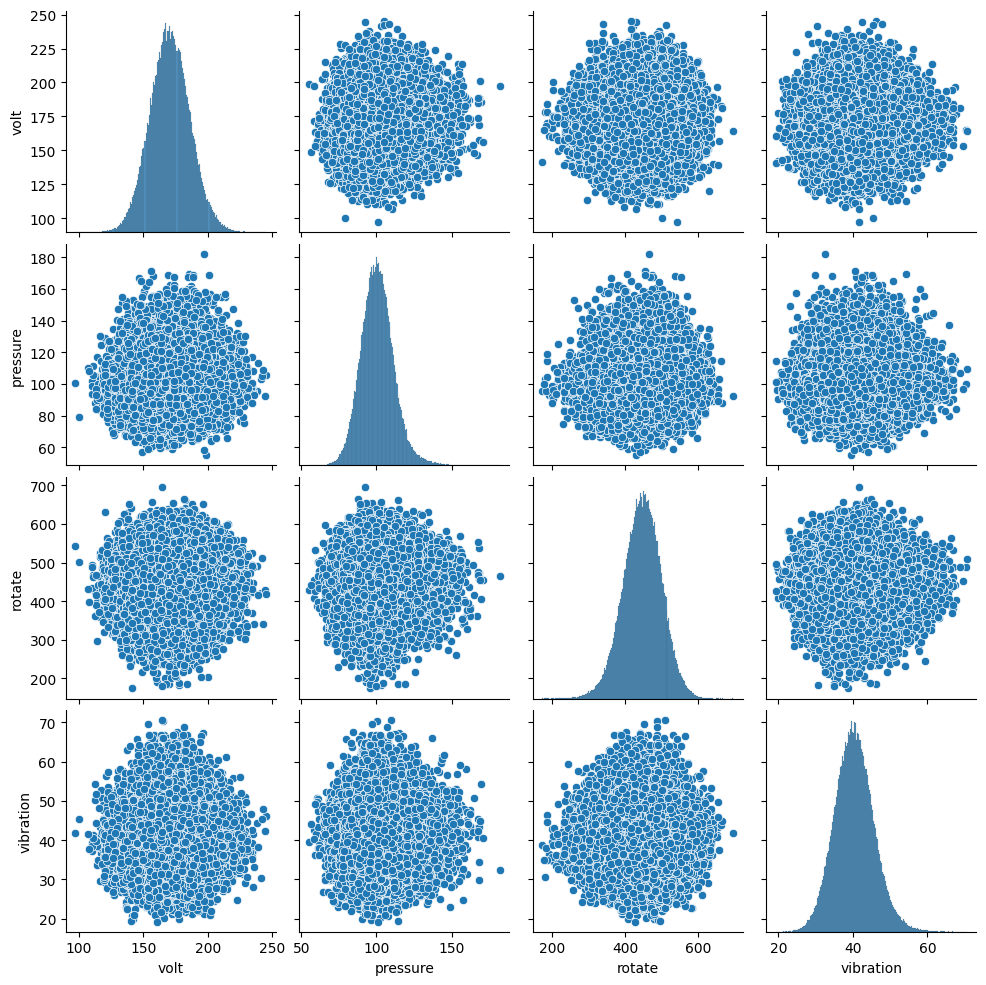

In [33]:
plt.figure(figsize=(12, 6))
sns.pairplot(PdM_telemetry[['volt', 'pressure', 'rotate', 'vibration']])

Text(0.5, 1.0, 'Pressure vs. Rotation')

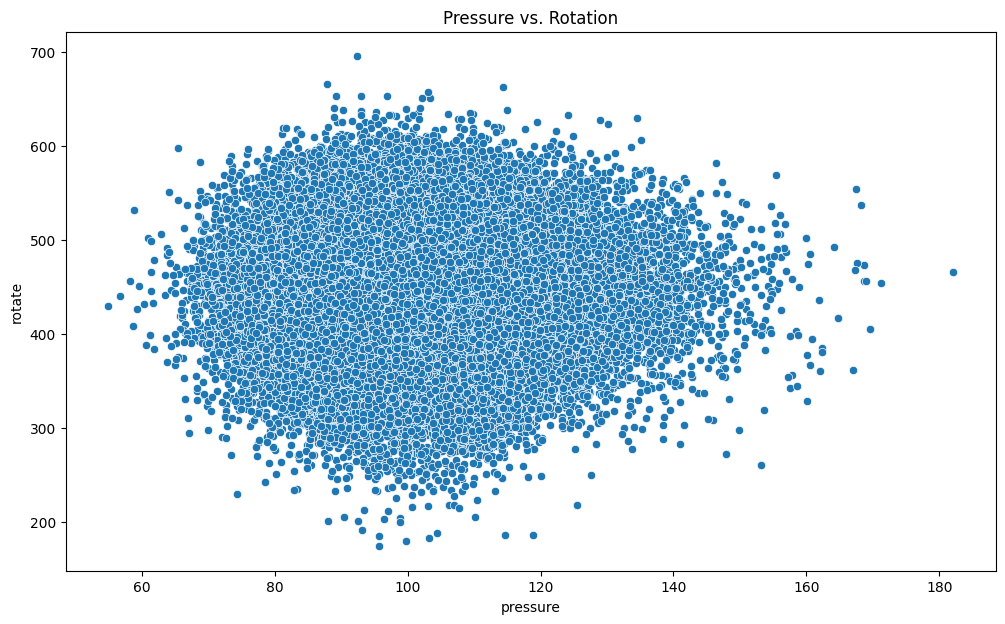

In [22]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=PdM_telemetry, x='pressure', y='rotate')
plt.title('Pressure vs. Rotation')

Text(0.5, 1.0, 'Pressure vs. Rotation')

<Figure size 1200x700 with 0 Axes>

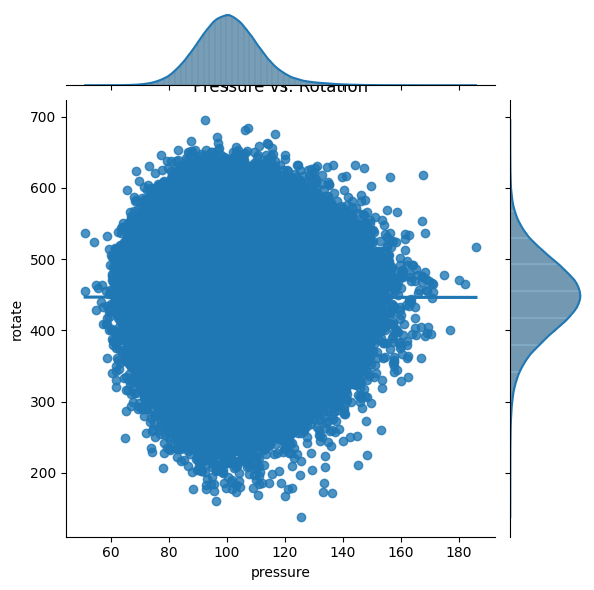

In [54]:
plt.figure(figsize=(12,7))
sns.jointplot(data=PdM_telemetry, x='pressure', y='rotate',kind="reg")
plt.title('Pressure vs. Rotation')

Text(0.5, 1.0, 'Pressure vs. Rotation')

<Figure size 1200x700 with 0 Axes>

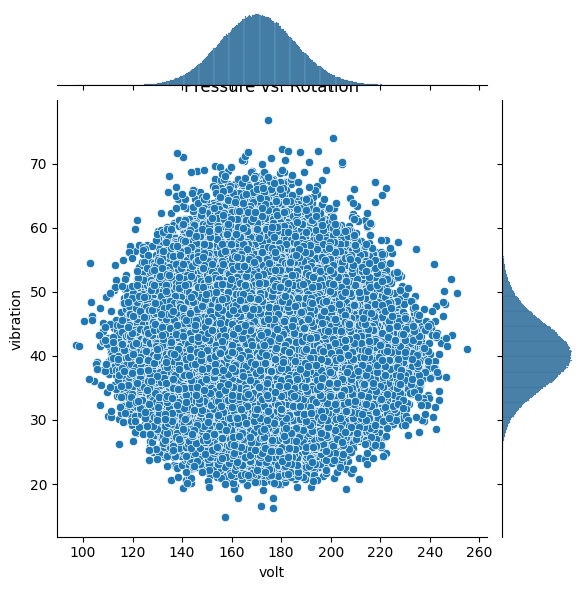

In [61]:
plt.figure(figsize=(12,7))
sns.jointplot(data=PdM_telemetry, x='volt', y='vibration')
plt.title('Pressure vs. Rotation')

In [90]:
PdM_errors = pd.read_csv('/content/PdM_errors.csv')

In [91]:
PdM_errors.head(10)

,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4
5,2015-01-25 15:00:00,1,error4
6,2015-01-27 04:00:00,1,error1
7,2015-03-03 22:00:00,1,error2
8,2015-03-05 06:00:00,1,error1
9,2015-03-20 18:00:00,1,error1


In [92]:
PdM_errors = pd.get_dummies(PdM_errors, columns=['errorID'])

In [93]:
PdM_errors.head()

,datetime,machineID,errorID_error1,errorID_error2,errorID_error3,errorID_error4,errorID_error5
0,2015-01-03 07:00:00,1,1,0,0,0,0
1,2015-01-03 20:00:00,1,0,0,1,0,0
2,2015-01-04 06:00:00,1,0,0,0,0,1
3,2015-01-10 15:00:00,1,0,0,0,1,0
4,2015-01-22 10:00:00,1,0,0,0,1,0


<Figure size 1200x600 with 0 Axes>

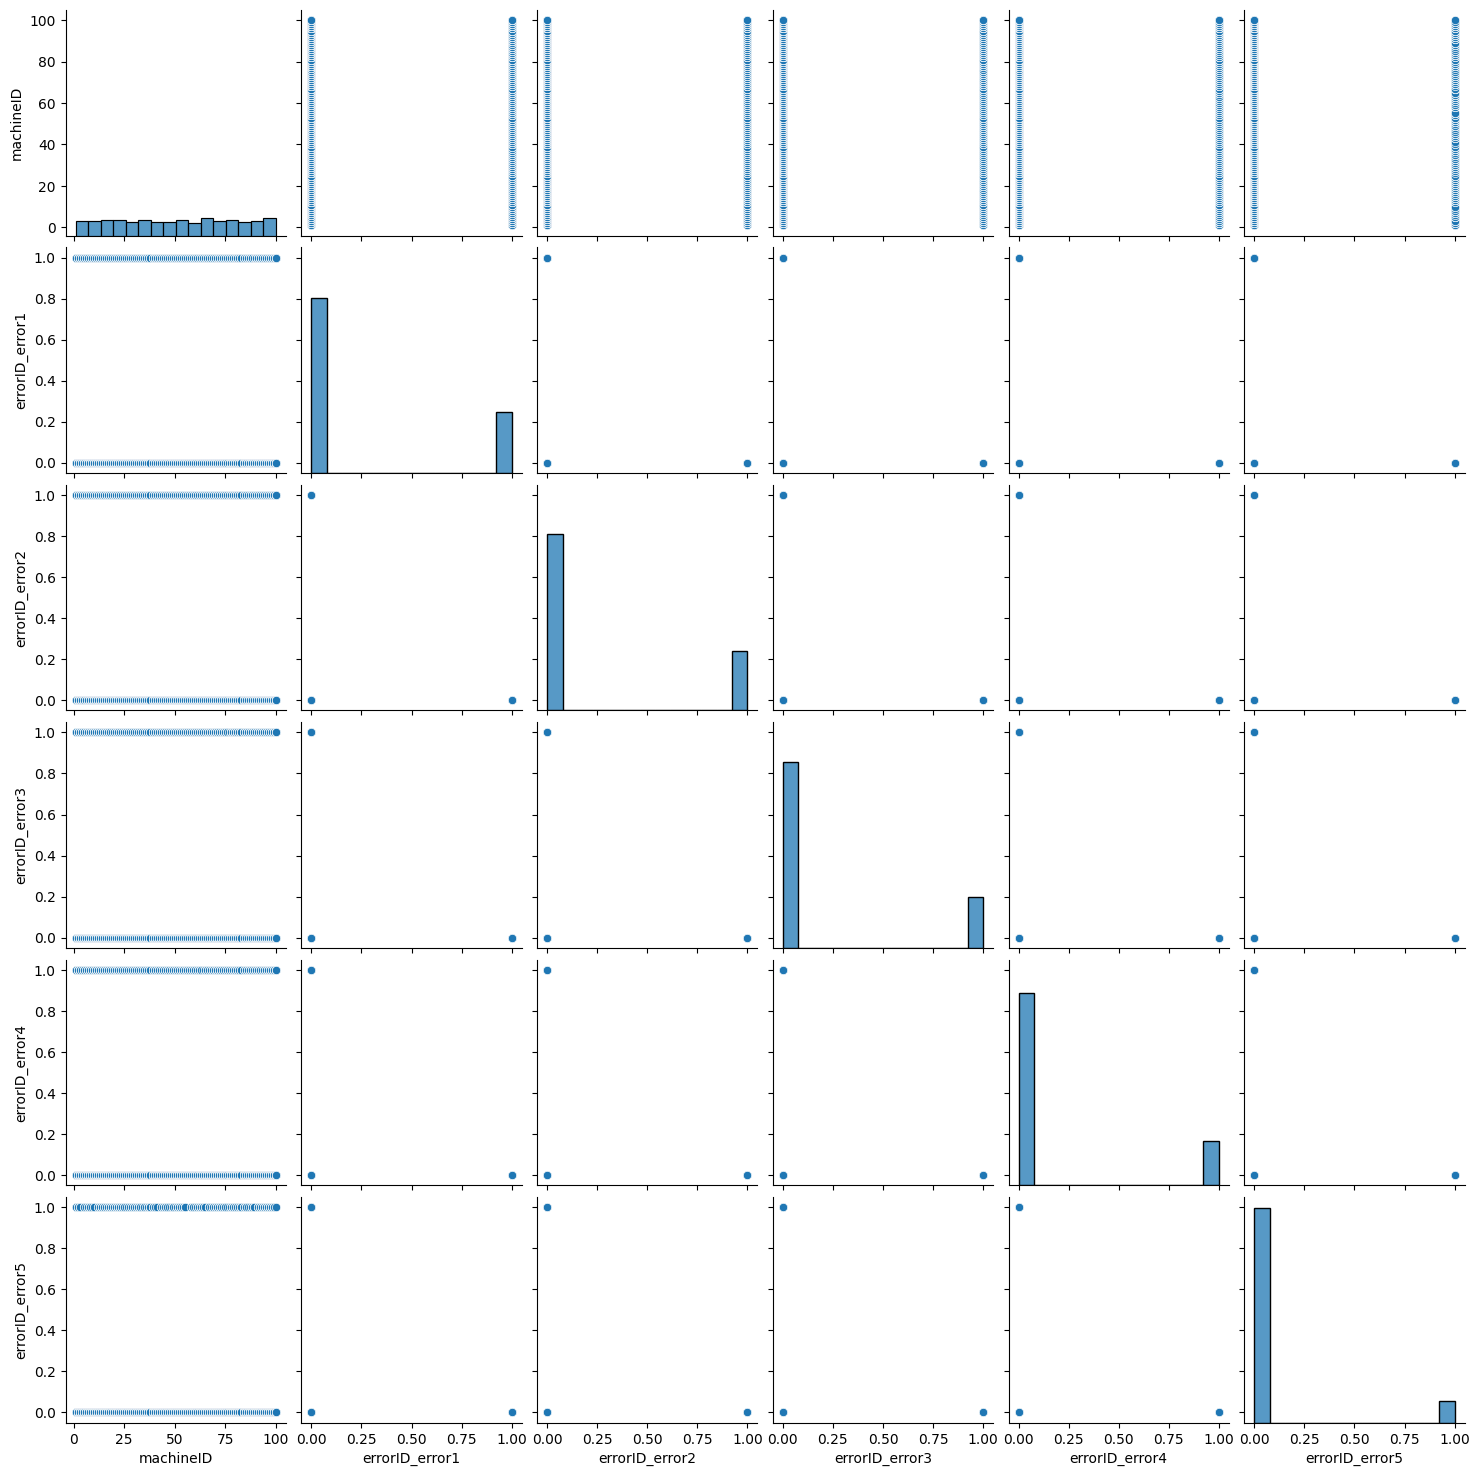

In [97]:
plt.figure(figsize=(12, 6))
sns.pairplot(PdM_errors)